In [25]:
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os
from scipy import stats
from sklearn.metrics import roc_curve

sys.path.insert(0, '/home/leo_dacasi/Dokumente/summerofcode/ENFify/enfify')

from enf_estimation import segmented_freq_estimation_DFT1, segmented_phase_estimation_hilbert
from preprocessing import downsampling_alpha, bandpass_filter
from enf_enhancement import RFA, VariationalModeDecomposition

import soundfile as sf
import math
import cmath

In [3]:
noise_fs, down_sig_noise = wavfile.read('/home/leo_dacasi/Dokumente/summerofcode/Enfify Data Synced/interim/ENF-WHU-Dataset/1min_noise/1min_noisy_down/down_min_003.wav')
cut_noise_fs, cut_down_sig_noise = wavfile.read('/home/leo_dacasi/Dokumente/summerofcode/Enfify Data Synced/interim/ENF-WHU-Dataset/1min_noise/1min_noisy_down_cut/down_cut_min_003.wav')
ref_fs, down_sig_ref = wavfile.read('/home/leo_dacasi/Dokumente/summerofcode/Enfify Data Synced/interim/ENF-WHU-Dataset/1min_ref/1min_enf_ref_data/min_001_ref.wav')

n_noise = np.arange(len(down_sig_noise))
n_noise_cut = np.arange(len(cut_down_sig_noise))
n_ref = np.arange(len(down_sig_ref))

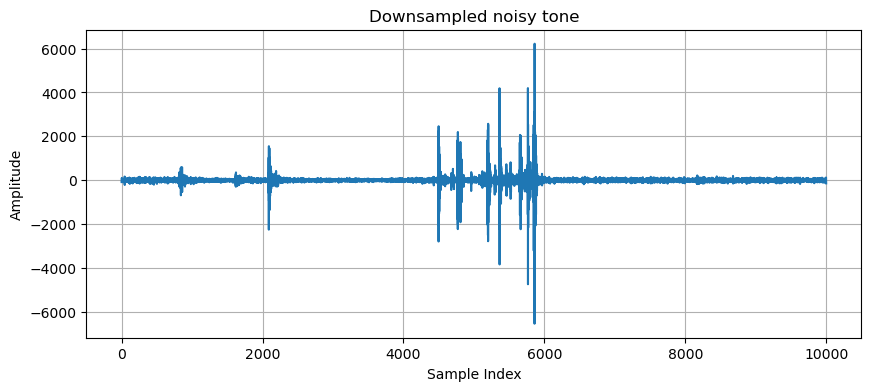

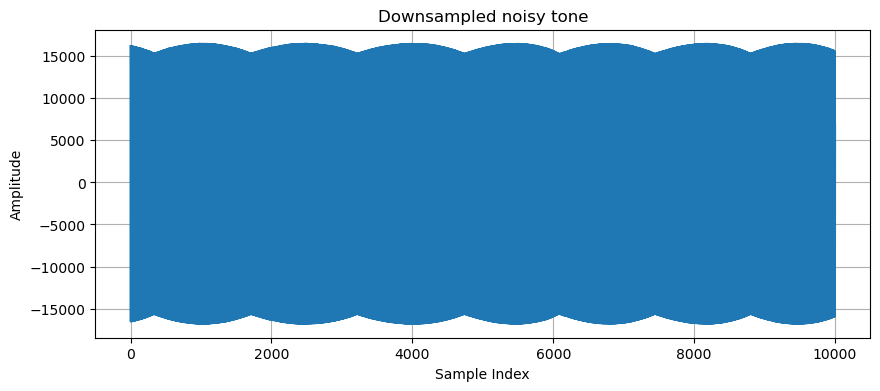

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(n_noise[:10_000], down_sig_noise[:10_000])
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_ref[:10_000], down_sig_ref[:10_000])
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

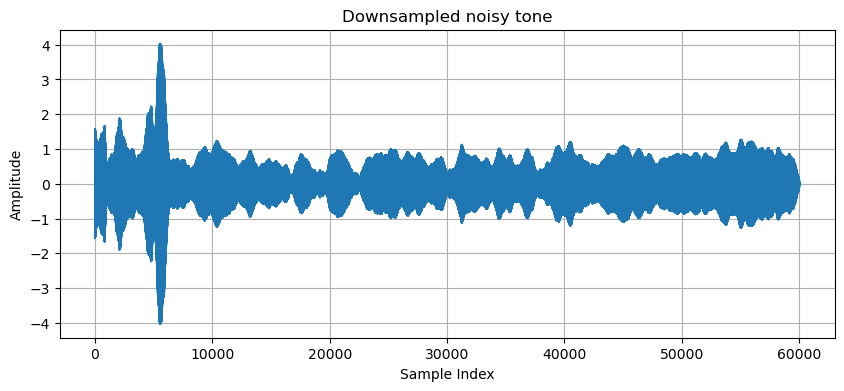

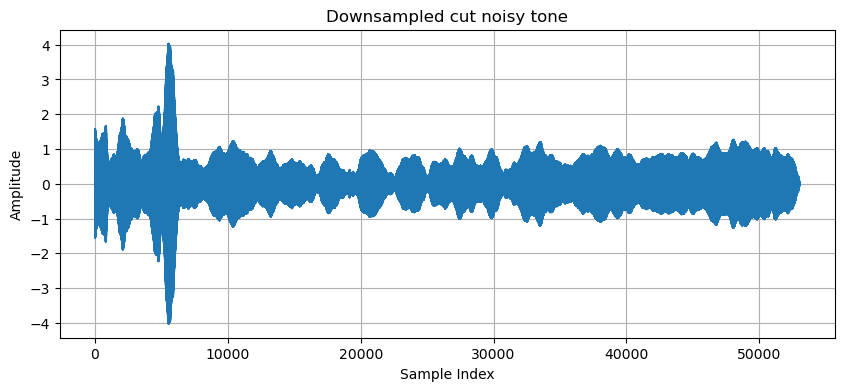

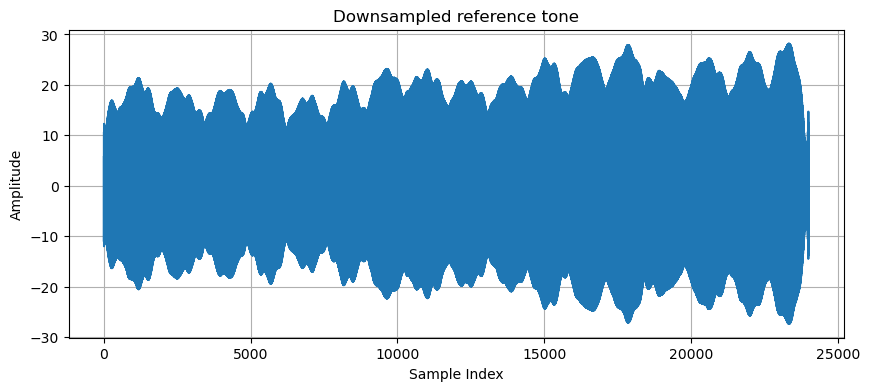

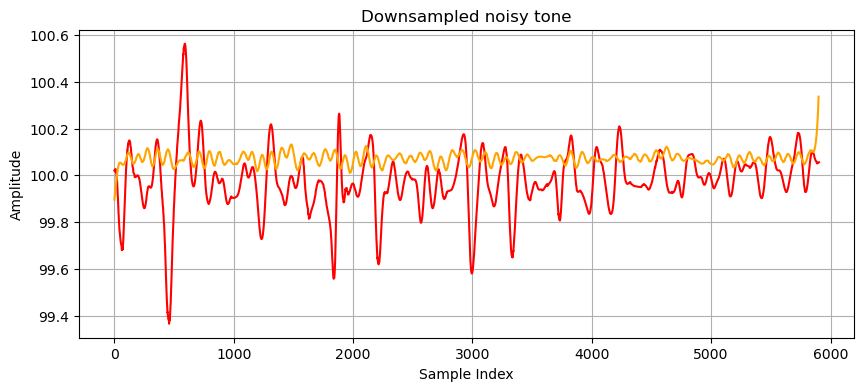

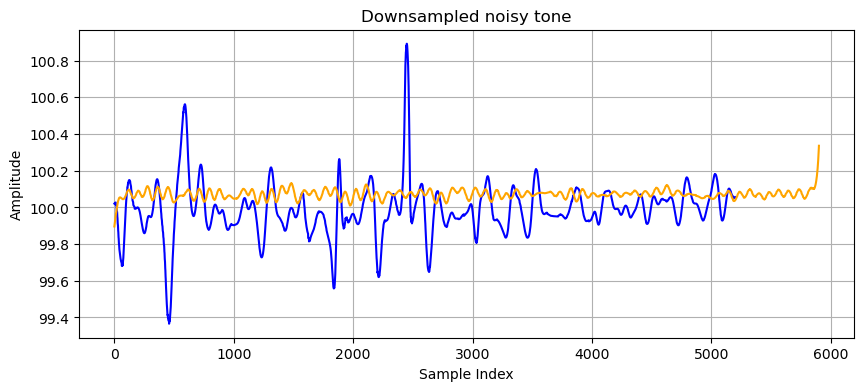

In [5]:
lowcut = 99.5
highcut = 100.5
bandpass_sig = bandpass_filter(down_sig_noise, lowcut, highcut, noise_fs, 1)
bandpass_sig_cut = bandpass_filter(cut_down_sig_noise, lowcut, highcut, noise_fs, 1)
bandpass_ref = bandpass_filter(down_sig_ref, lowcut, highcut, ref_fs, 1)

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_sig)
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_noise_cut, bandpass_sig_cut)
plt.title('Downsampled cut noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_ref, bandpass_ref)
plt.title('Downsampled reference tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

freqs_DFT1_cut = segmented_freq_estimation_DFT1(bandpass_sig_cut, cut_noise_fs, 100, 20_000, 100)
freqs_DFT1 = segmented_freq_estimation_DFT1(bandpass_sig, noise_fs, 100, 20_000, 100)
freqs_ref = segmented_freq_estimation_DFT1(bandpass_ref, ref_fs, 100, 20_000, 100)

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1, color="red")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1_cut, color="blue")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [6]:
for i in tqdm(range(5)):    
    alpha =  5000            # Balancing parameter of the data-fidelity constraint
    tau = 0                 # Noise-tolerance (no strict fidelity enforcement)
    n_mode = 1              # Number of modes to be recovered
    DC = 0
    tol =1e-7    # Tolerance of convergence criterion

    u_clean, _, _ = VariationalModeDecomposition(bandpass_sig, alpha, tau, n_mode, DC, tol)
    bandpass_sig = u_clean[0]

    u_clean_cut, _, _ = VariationalModeDecomposition(bandpass_sig_cut, alpha, tau, n_mode, DC, tol)
    bandpass_sig_cut = u_clean_cut[0]


100%|██████████| 5/5 [00:00<00:00,  9.21it/s]


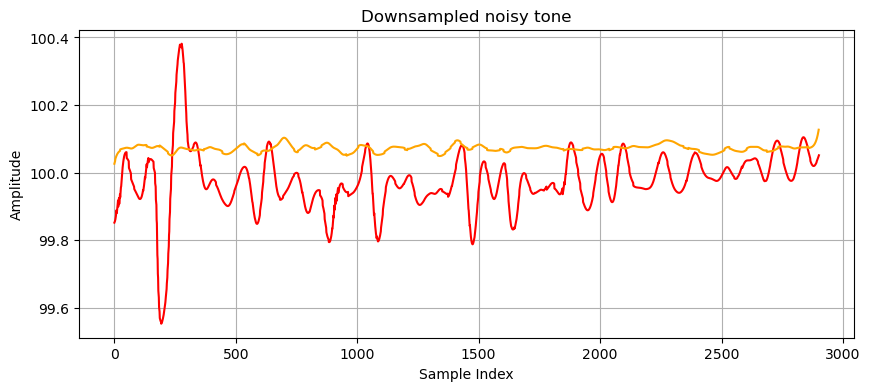

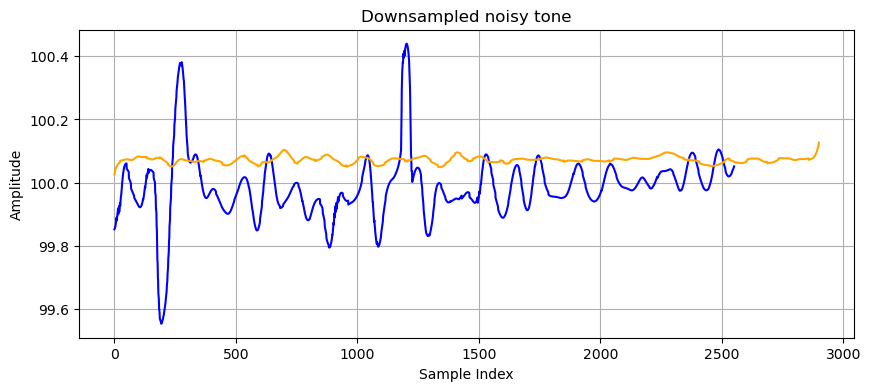

In [7]:
freqs_DFT1_cut = segmented_freq_estimation_DFT1(bandpass_sig_cut, cut_noise_fs, 100, 20_000, 50)
freqs_DFT1 = segmented_freq_estimation_DFT1(bandpass_sig, noise_fs, 100, 20_000, 50)
freqs_ref = segmented_freq_estimation_DFT1(bandpass_ref, ref_fs, 100, 20_000, 50)

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1, color="red")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1_cut, color="blue")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

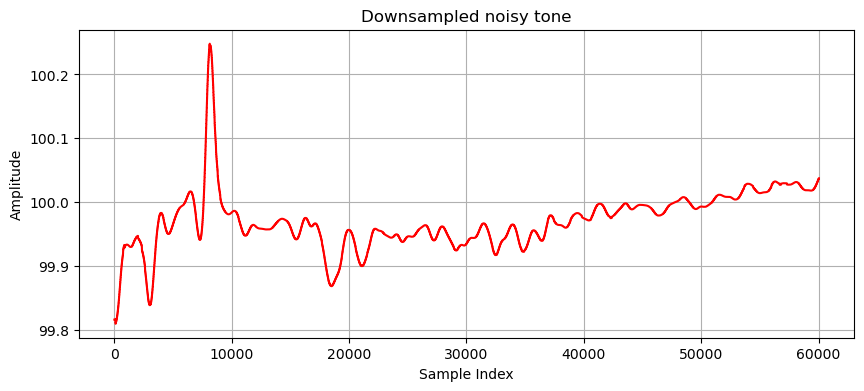

 33%|███▎      | 1/3 [00:50<01:40, 50.05s/it]

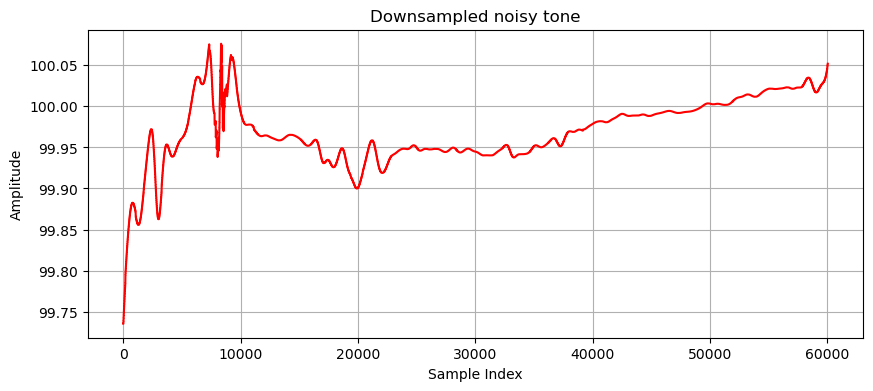

 67%|██████▋   | 2/3 [01:37<00:48, 48.29s/it]

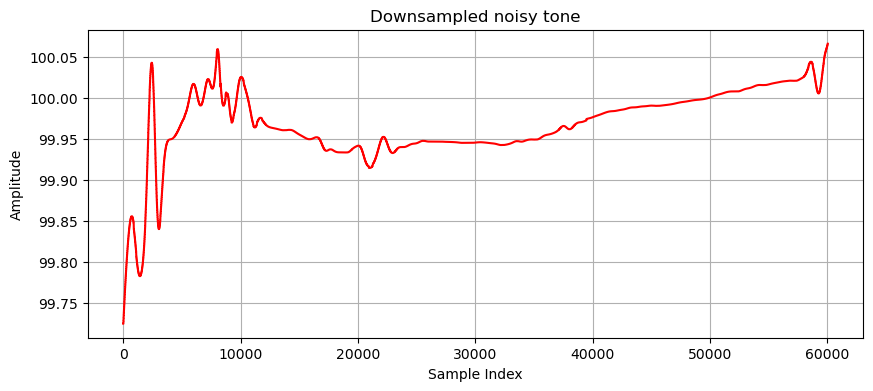

100%|██████████| 3/3 [02:23<00:00, 47.76s/it]


In [8]:
fs = noise_fs
f0 = 100
I = 3
epsilon = 1e-20
tau = int(2500)

denoised_signal = RFA(bandpass_sig, noise_fs, tau, epsilon, I, f0)

  0%|          | 0/3 [00:00<?, ?it/s]

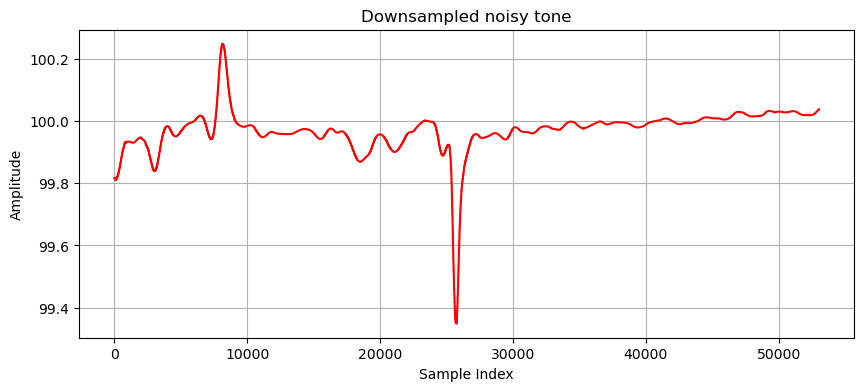

 33%|███▎      | 1/3 [00:42<01:24, 42.23s/it]

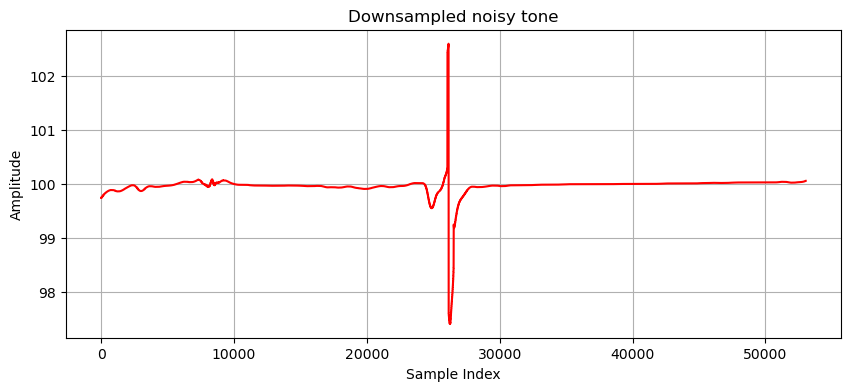

 67%|██████▋   | 2/3 [01:23<00:41, 41.68s/it]

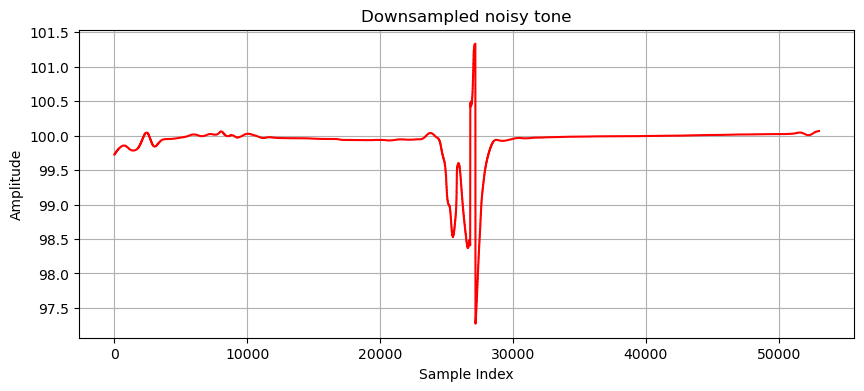

100%|██████████| 3/3 [02:03<00:00, 41.31s/it]


In [9]:
fs = noise_fs
f0 = 100
I = 3
epsilon = 1e-20
tau = int(2500)

cut_denoised_signal = RFA(bandpass_sig_cut, cut_noise_fs, tau, epsilon, I, f0)

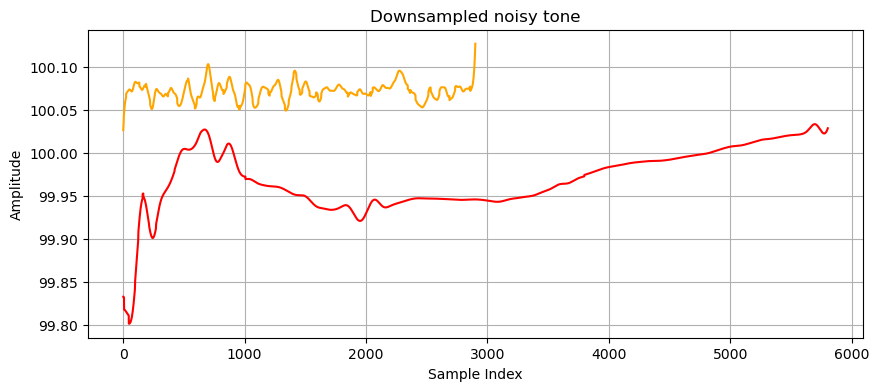

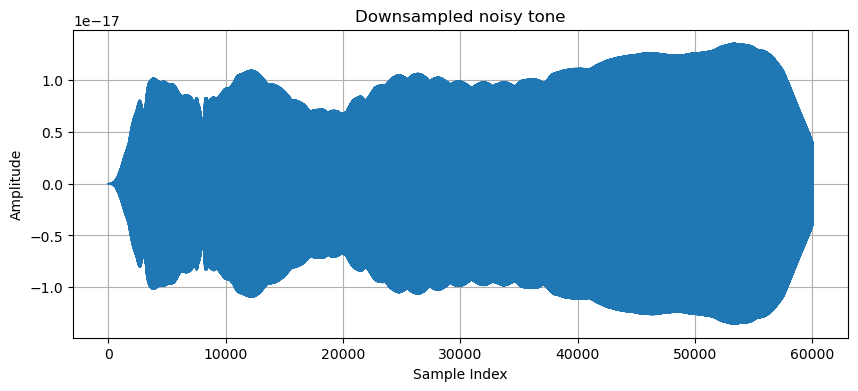

60032
60032


In [10]:
freqs_DFT1 = segmented_freq_estimation_DFT1(denoised_signal, noise_fs, 200, 20_000, 100)

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1, color="red")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(denoised_signal)
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print(len(denoised_signal))
print(len(bandpass_sig))

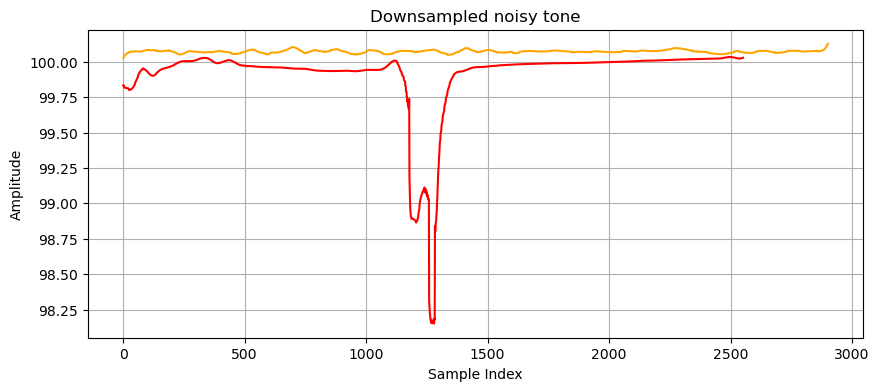

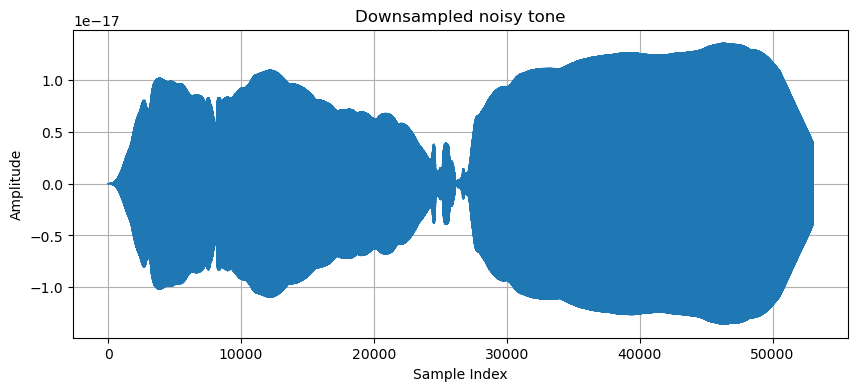

53032
53032


In [11]:
freqs_DFT1_cut = segmented_freq_estimation_DFT1(cut_denoised_signal, cut_noise_fs, 100, 20_000, 50)

plt.figure(figsize=(10, 4))
plt.plot(freqs_DFT1_cut, color="red")
plt.plot(freqs_ref, color="orange")
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(cut_denoised_signal)
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print(len(cut_denoised_signal))
print(len(bandpass_sig_cut))

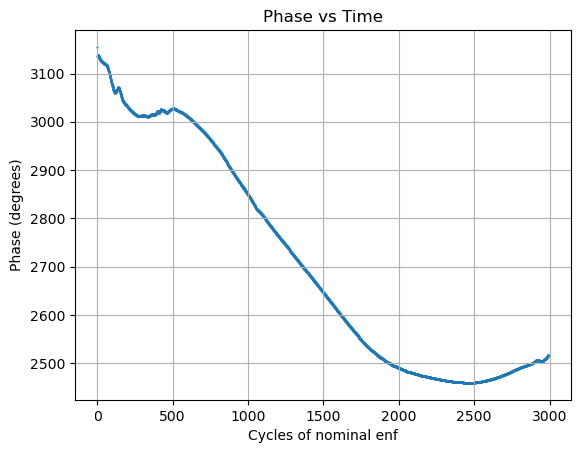

In [20]:
N_DFT = 20_000
NUM_CYCLES = 10

phases_denoised = segmented_phase_estimation_hilbert(denoised_signal, fs, NUM_CYCLES, 50)
phases_denoised = np.unwrap(phases_denoised)

x_denoised = np.arange(len(phases_denoised))
plt.scatter(x_denoised, np.degrees(phases_denoised), s= 0.5)
plt.xlabel("Cycles of nominal enf")
plt.ylabel("Phase (degrees)")
plt.title("Phase vs Time")
plt.grid(True)
plt.show()

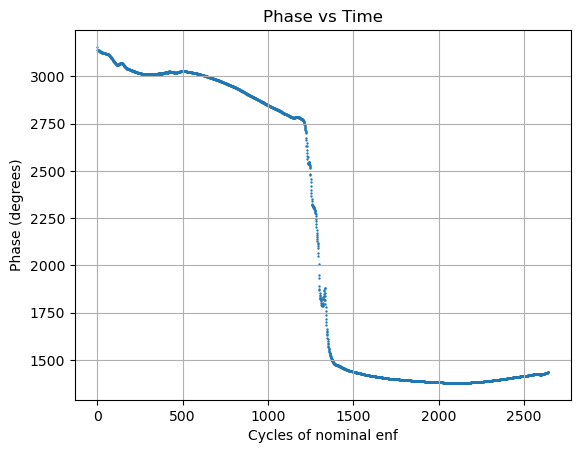

In [19]:
N_DFT = 20_000
NUM_CYCLES = 10

phases_denoised_cut = segmented_phase_estimation_hilbert(cut_denoised_signal, fs, NUM_CYCLES, 50)
phases_denoised_cut = np.unwrap(phases_denoised_cut)

x_denoised_cut = np.arange(len(phases_denoised_cut))
plt.scatter(x_denoised_cut, np.degrees(phases_denoised_cut), s= 0.5)
plt.xlabel("Cycles of nominal enf")
plt.ylabel("Phase (degrees)")
plt.title("Phase vs Time")
plt.grid(True)
plt.show()

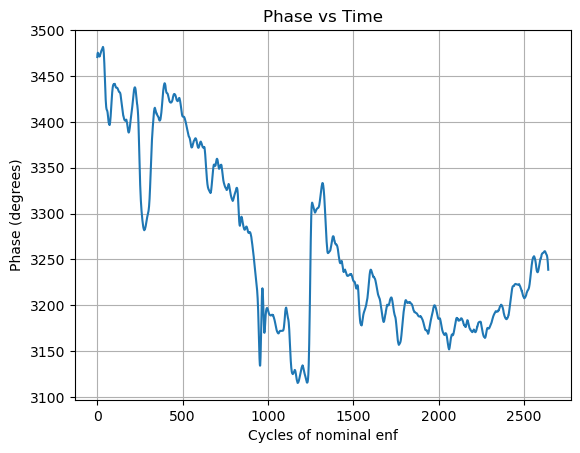

In [21]:
N_DFT = 20_000
NUM_CYCLES = 10

phases_cut = segmented_phase_estimation_hilbert(bandpass_sig_cut, fs, NUM_CYCLES, 50)
phases_cut = np.unwrap(phases_cut)

x_cut = np.arange(len(phases_cut))
plt.plot(x_cut, np.degrees(phases_cut))
plt.xlabel("Cycles of nominal enf")
plt.ylabel("Phase (degrees)")
plt.title("Phase vs Time")
plt.grid(True)
plt.show()

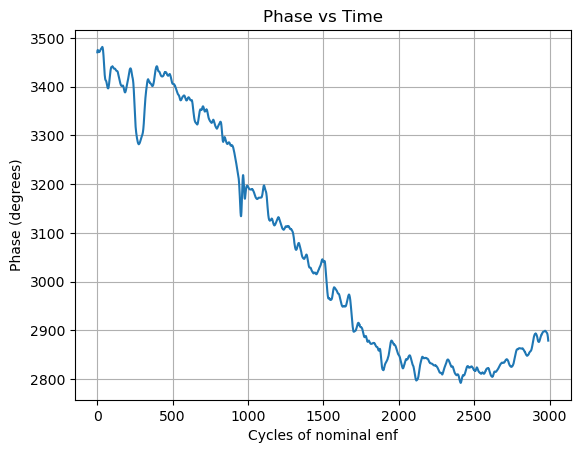

In [22]:
N_DFT = 20_000
NUM_CYCLES = 10

phases = segmented_phase_estimation_hilbert(bandpass_sig, fs, NUM_CYCLES, 50)
phases = np.unwrap(phases)

x = np.arange(len(phases))
plt.plot(x, np.degrees(phases))
plt.xlabel("Cycles of nominal enf")
plt.ylabel("Phase (degrees)")
plt.title("Phase vs Time")
plt.grid(True)
plt.show()

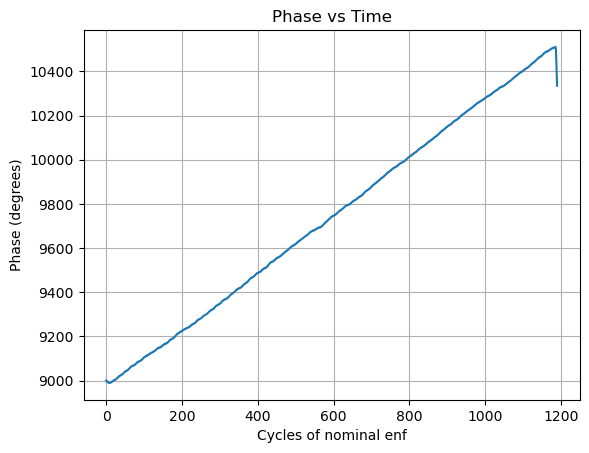

In [23]:
N_DFT = 20_000
NUM_CYCLES = 10

phases_ref = segmented_phase_estimation_hilbert(bandpass_ref, fs, NUM_CYCLES, 50)
phases_ref = np.unwrap(phases_ref)

x_ref = np.arange(len(phases_ref))
plt.plot(x_ref, np.degrees(phases_ref))
plt.xlabel("Cycles of nominal enf")
plt.ylabel("Phase (degrees)")
plt.title("Phase vs Time")
plt.grid(True)
plt.show()

In [40]:
def find_cut_in_phases(phases, x):
    """_summary_

    Args:
        phases (_type_): _description_
        x (_type_): _description_

    Returns:
        _type_: _description_
    """

    range_threshold = 20
    window_size = 10
    second_der = np.gradient(np.gradient(phases, x), x)

    plt.scatter(x, second_der, s=10)
    plt.xlabel("Cycles of nominal enf")
    plt.ylabel("second derivative")
    plt.title("Second derivative")
    plt.grid(True)
    plt.show()

    z_scores = np.abs(stats.zscore(second_der))
    outliers = np.array(np.where(z_scores > 5))

    plt.scatter(x, z_scores, s=10)
    plt.xlabel("Cycles of nominal enf")
    plt.ylabel("second derivative")
    plt.title("Second derivative")
    plt.grid(True)
    plt.show()

    if not np.any(outliers):
        return phases, x, outliers

    else:
        discontinuities = []
        i = 0

        while i < len(outliers[0]) - 1:
            start = outliers[0][i]
            while (
                i < len(outliers[0]) - 1
                and (outliers[0][i + 1] - outliers[0][i]) <= range_threshold
            ):
                i += 1
            end = outliers[0][i]

            # Search for the cut discontinuitites
            if end - start >= window_size:
                segment = second_der[start : end + 1]
                pos_count = np.sum(segment > 0)
                neg_count = np.sum(segment < 0)

                if pos_count > 0 and neg_count > 0:
                    discontinuities.append((start, end))

            i += 1

        discontinuities = np.array(discontinuities)

        if not np.any(discontinuities):
            return phases, x, discontinuities

        start = discontinuities[0][0]
        end = discontinuities[0][1]

        phases_new = phases[int(start) - 200 : int(end) + 200]
        x_new = x[int(start) - 200 : int(end) + 200]

        return phases_new, x_new, discontinuities


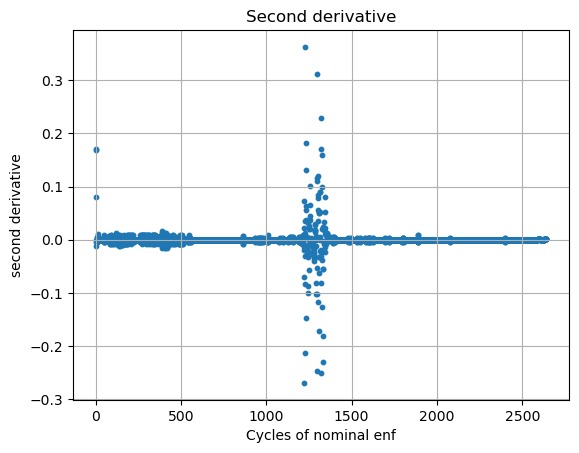

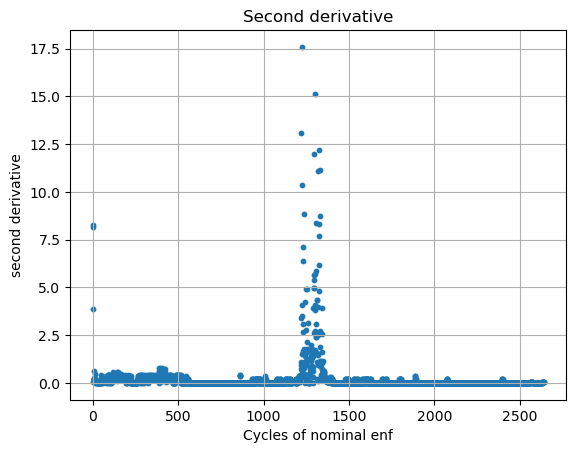

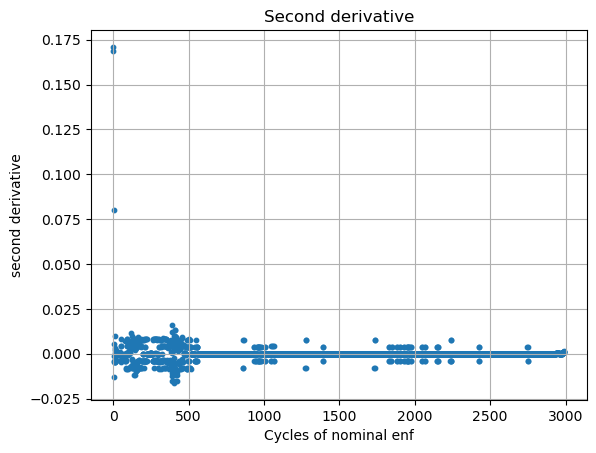

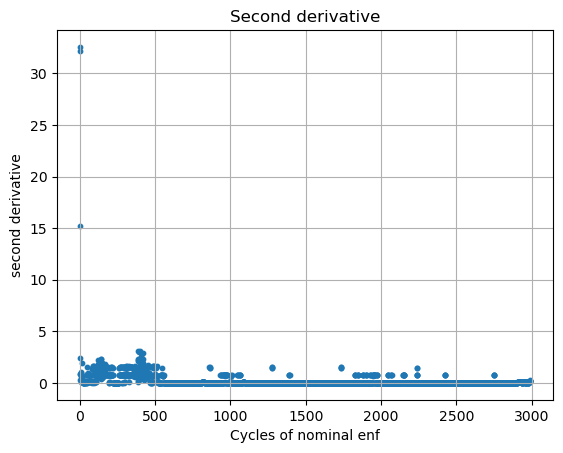

(array([55.06690366, 54.74057936, 54.7562649 , ..., 43.91206939,
        43.92607116, 43.94183242]),
 array([   0,    1,    2, ..., 2989, 2990, 2991]),
 array([], dtype=float64))

In [41]:
find_cut_in_phases(phases_denoised_cut, x_denoised_cut)
find_cut_in_phases(phases_denoised, x_denoised)

In [42]:
from scipy.io.wavfile import write

write("cut_denoised_003.wav", sample_rate, audio_data_int16)
write("denoised_003.wav", sample_rate, audio_data_int16)
